# Objective
Basic clustering and analysis for an SNR test image with the following properties:

- Spot density: 0.002 spots/pixel
- Spot shape: 2D Gaussian (sigma = 2 pixels)
- SNR distribution: Gaussian (mu = 10, sigma = 0)
- Background image: tissue
- Spot image generated 20180824
- Sent for annotation 20180824
- Annotations received 20180827

In [1]:
from SpotAnnotationAnalysis import SpotAnnotationAnalysis
from BaseAnnotation import BaseAnnotation
from QuantiusAnnotation import QuantiusAnnotation
import math
worker_marker_size = 8
cluster_marker_size = 40
bigger_window_size = True
img_height = 300

In [2]:
json_filename = 'Spot_density.json'
img_name = 'snr_10_0_density_0.002'

### Load data, get the dataframe 

In [3]:
img_filename = img_name+'_spot_img.png'
img_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/density_test/spot_images/'+img_filename
csv_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/density_test/spot_data/'+img_name+'_coord_snr_list.csv'
json_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/density_test/'+json_filename

ba = QuantiusAnnotation(json_filepath)
sa = SpotAnnotationAnalysis(ba)
anno_all = ba.df()

# Overview of Annotations 
#### Worker annotations only

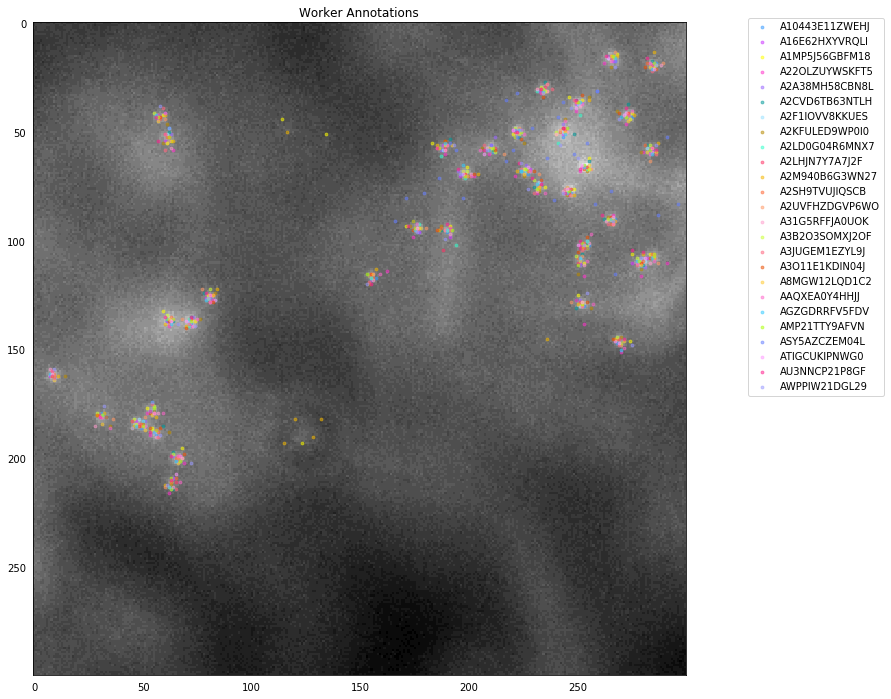

In [4]:
show_ref_points = False
show_workers = True
show_clusters = False
clustering_params = None
show_correctness_workers = False
show_correctness_clusters = False
show_NN_inc = False
correctness_threshold = None

sa.plot_annotations(anno_all, img_filename, img_filepath, csv_filepath, worker_marker_size, cluster_marker_size, show_ref_points, show_workers, show_clusters, show_correctness_workers, show_correctness_clusters, show_NN_inc, correctness_threshold, clustering_params, bigger_window_size)

#### Show reference points (big yellow dots)

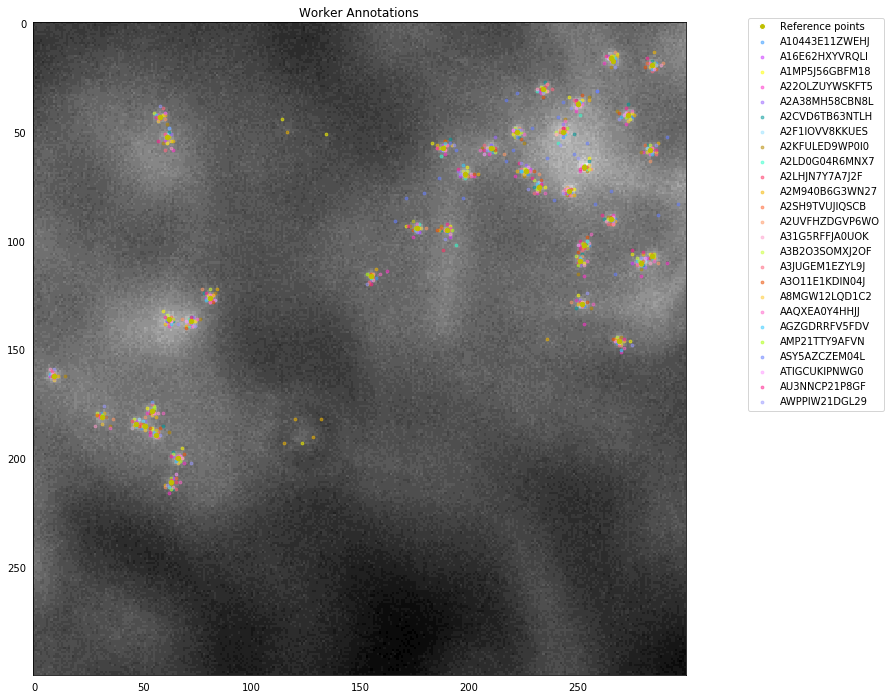

In [5]:
show_ref_points = True
show_workers = True
show_clusters = False
clustering_params = None
show_correctness_workers = False
show_correctness_clusters = False
show_NN_inc = False
correctness_threshold = None

sa.plot_annotations(anno_all, img_filename, img_filepath, csv_filepath, worker_marker_size, cluster_marker_size, show_ref_points, show_workers, show_clusters, show_correctness_workers, show_correctness_clusters, show_NN_inc, correctness_threshold, clustering_params, bigger_window_size)

#### Worker annotations with cluster centroids

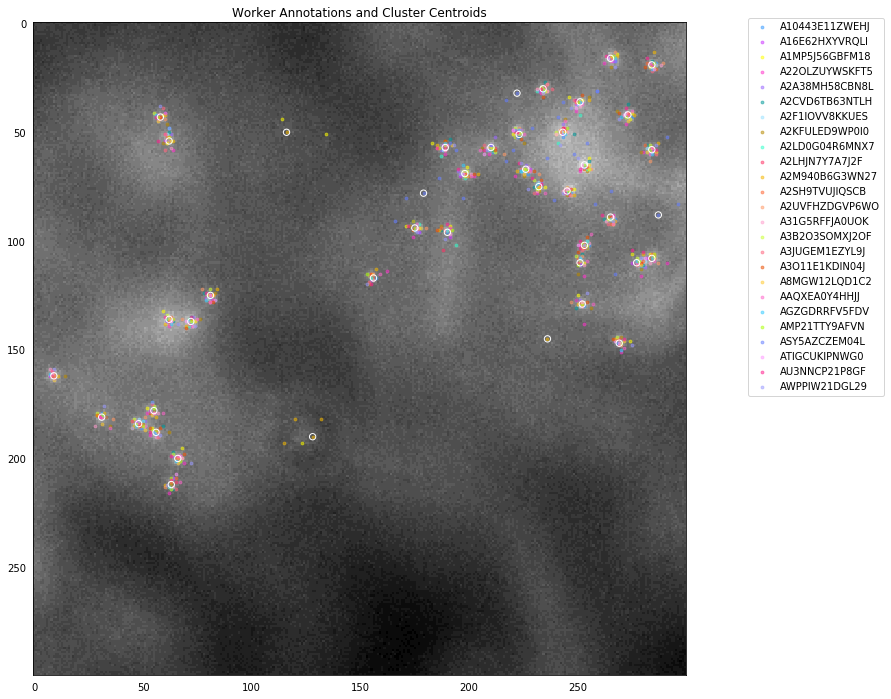

In [6]:
show_ref_points = False
show_workers = True
show_clusters = True
clustering_params = ['AffinityPropagation', -350]
show_correctness_workers = False
show_correctness_clusters = False
show_NN_inc = False
correctness_threshold = None

clusters = sa.plot_annotations(anno_all, img_filename, img_filepath, csv_filepath, worker_marker_size, cluster_marker_size, show_ref_points, show_workers, show_clusters, show_correctness_workers, show_correctness_clusters, show_NN_inc, correctness_threshold, clustering_params, bigger_window_size)

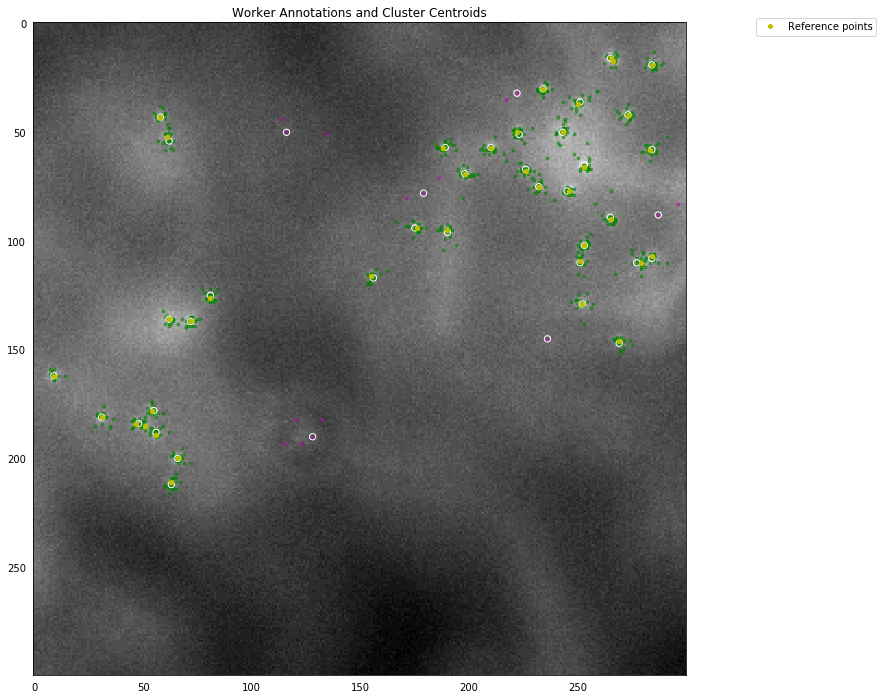

In [7]:
show_ref_points = True
show_workers = True
show_clusters = True
clustering_params = ['AffinityPropagation', -350]
show_correctness_workers = True
show_correctness_clusters = False
show_NN_inc = False
correctness_threshold = 4

clusters = sa.plot_annotations(anno_all, img_filename, img_filepath, csv_filepath, worker_marker_size, cluster_marker_size, show_ref_points, show_workers, show_clusters, show_correctness_workers, show_correctness_clusters, show_NN_inc, correctness_threshold, clustering_params, bigger_window_size)

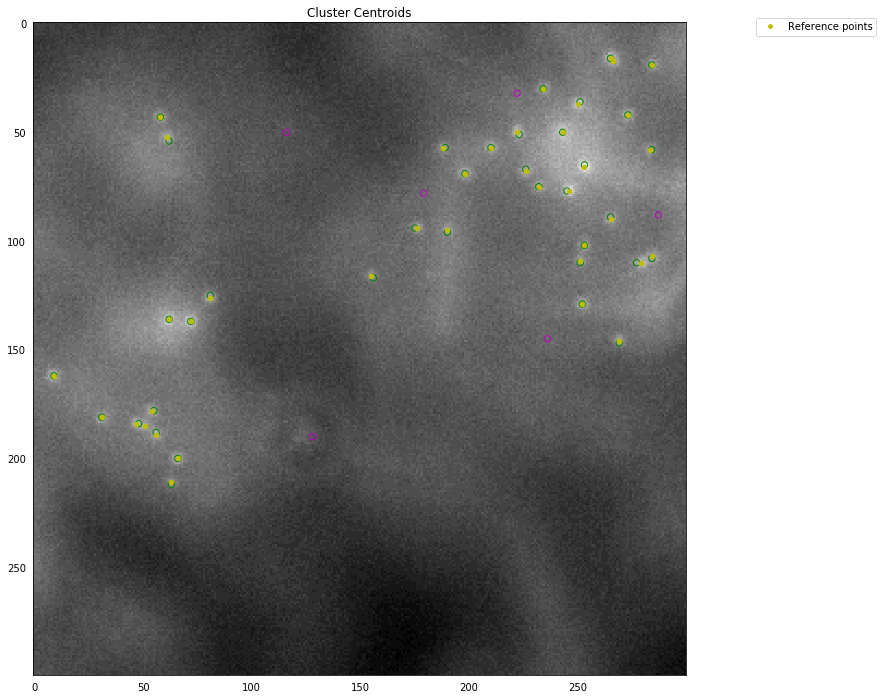

In [8]:
show_ref_points = True
show_workers = False
show_clusters = True
clustering_params = ['AffinityPropagation', -350]
show_correctness_workers = False
show_correctness_clusters = True
show_NN_inc = False
correctness_threshold = 4

clusters = sa.plot_annotations(anno_all, img_filename, img_filepath, csv_filepath, worker_marker_size, cluster_marker_size, show_ref_points, show_workers, show_clusters, show_correctness_workers, show_correctness_clusters, show_NN_inc, correctness_threshold, clustering_params, bigger_window_size)

# Clumpiness
Orange indicates clusters in which > 20% of unique workers have duplicates. (These clusters are possibly clumpy or entangled.)

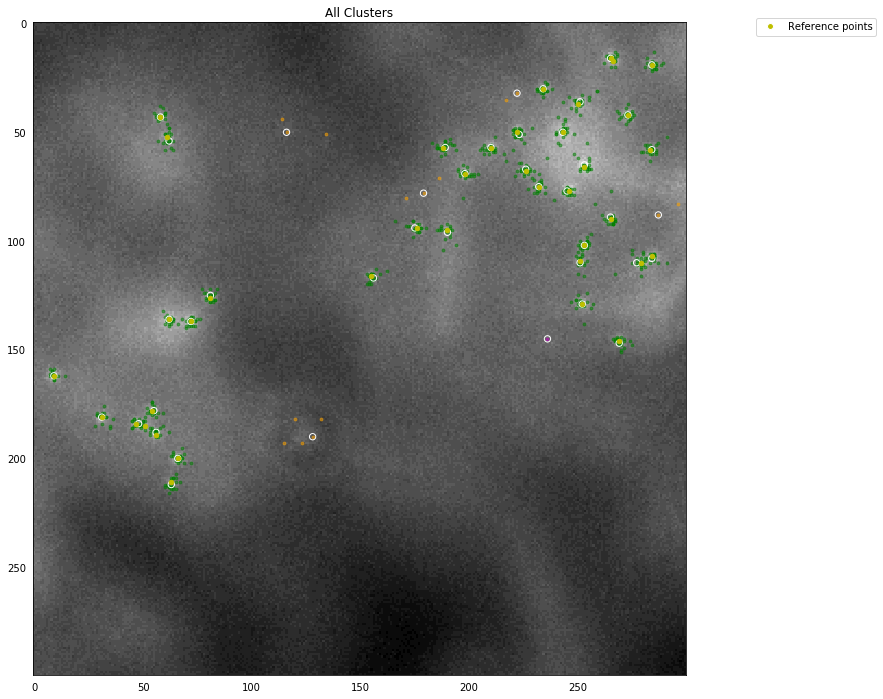

In [9]:
plot_title = "All Clusters"
show_possible_clumps = True
sa.plot_clusters(clusters, img_filename, img_filepath, img_height, csv_filepath, worker_marker_size, cluster_marker_size, correctness_threshold, show_possible_clumps, bigger_window_size, plot_title)

# Quick screen by cluster size 
(Use k-means threshold on number of unique workers annotating each cluster)

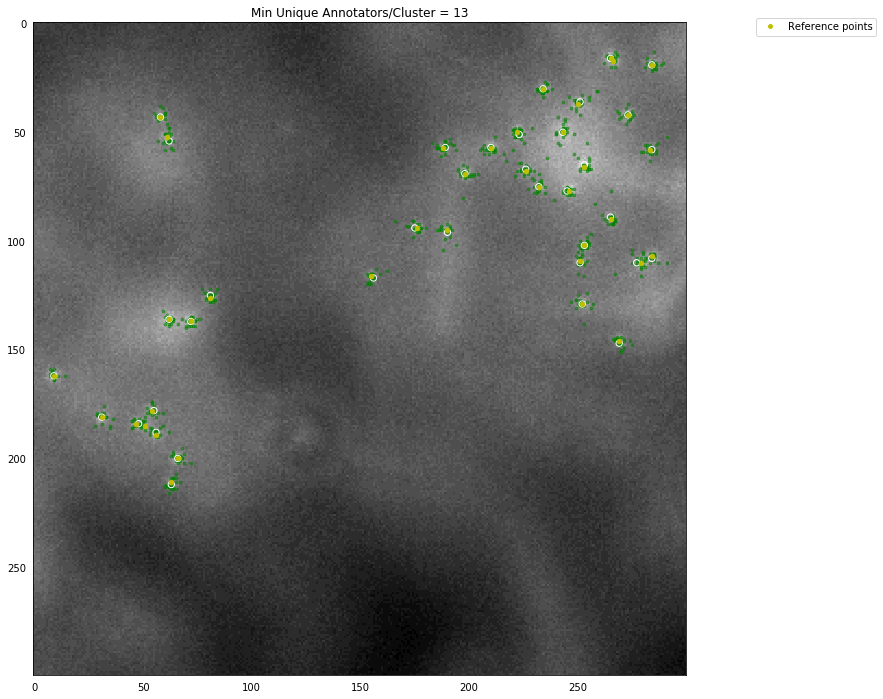

In [10]:
threshold = sa.get_cluster_size_threshold(clusters)
threshold = math.ceil(threshold)
small_clusters, large_clusters = sa.sort_clusters_by_size_input_threshold(clusters, threshold)
plot_title = "Min Unique Annotators/Cluster = " + str(threshold)
sa.plot_clusters(large_clusters, img_filename, img_filepath, img_height, csv_filepath, worker_marker_size, cluster_marker_size, correctness_threshold, show_possible_clumps, bigger_window_size, plot_title)

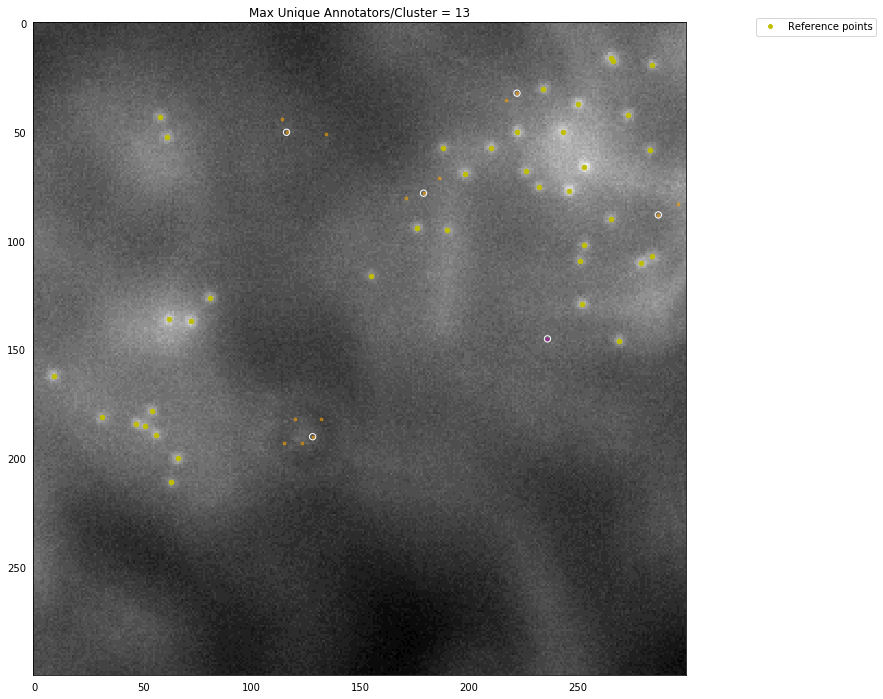

In [11]:
plot_title = "Max Unique Annotators/Cluster = " + str(math.floor(threshold))
sa.plot_clusters(small_clusters, img_filename, img_filepath, img_height, csv_filepath, worker_marker_size, cluster_marker_size, correctness_threshold, show_possible_clumps, bigger_window_size, plot_title)